In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=10, suppress=True)


In [37]:
# Load the data from csv
df = pd.read_csv('/Users/francescopapaleo/git-box/smc-spring-reverb/logs/1-TCN__noncausal__5-10-1__fraction-1.0-bs8__loss-esr+dc/1-TCN__noncausal__5-10-1__fraction-1.0-bs8__loss-esr+dc/version_0/metrics.csv')

df

,train_loss_step,epoch,step,val_loss,val_loss_ESR,val_loss_DC,train_loss_epoch,train_epoch_mean
0,10.426281,0,0,NaN,NaN,NaN,NaN,NaN
1,3.599639,0,1,NaN,NaN,NaN,NaN,NaN
2,2.490109,0,2,NaN,NaN,NaN,NaN,NaN
3,1.456107,0,3,NaN,NaN,NaN,NaN,NaN
4,1.857773,0,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
602,0.971088,19,564,NaN,NaN,NaN,NaN,NaN
603,0.967533,19,565,NaN,NaN,NaN,NaN,NaN
604,1.084179,19,566,NaN,NaN,NaN,NaN,NaN
605,0.953971,19,567,NaN,NaN,NaN,NaN,NaN


In [38]:
# Define metrics
step_metrics = ['train_loss_step']
epoch_metrics = ['val_loss', 'val_loss_ESR', 'val_loss_DC', 'train_loss_epoch', 'train_epoch_mean']

# Generate a linspace for plotting
steps_train = df['step'].unique()
epochs = df['epoch'].unique()



In [39]:
# # Import necessary libraries
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Split your DataFrame into training and validation DataFrames based on the metric names
# train_df = df[step_metrics + ['step']]
# val_df = df[epoch_metrics + ['epoch']]

# # Drop NaN rows
# train_df = train_df.dropna()
# val_df = val_df.dropna()

# # Define the epochs and steps
# steps_train = train_df['step'].unique()
# epochs_val = val_df['epoch'].unique()

# # Plot training metrics
# fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# metric_data = scaler.fit_transform(train_df[['train_loss_step']])
# ax.plot(steps_train, metric_data, label='train_loss_step')
# ax.set_title("Normalized Training Losses per Step")
# ax.set_xlabel('Step')
# ax.set_ylabel('Loss')
# ax.legend()

# # Plot validation metrics
# for metric in epoch_metrics:
#     # Scale the metric data
#     metric_data = scaler.fit_transform(val_df[[metric]])
#     ax.plot(epochs_val, metric_data, label=metric)

# ax.set_title("Normalized Validation Losses per Epoch")
# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# ax.legend()

# plt.tight_layout()
# plt.show()


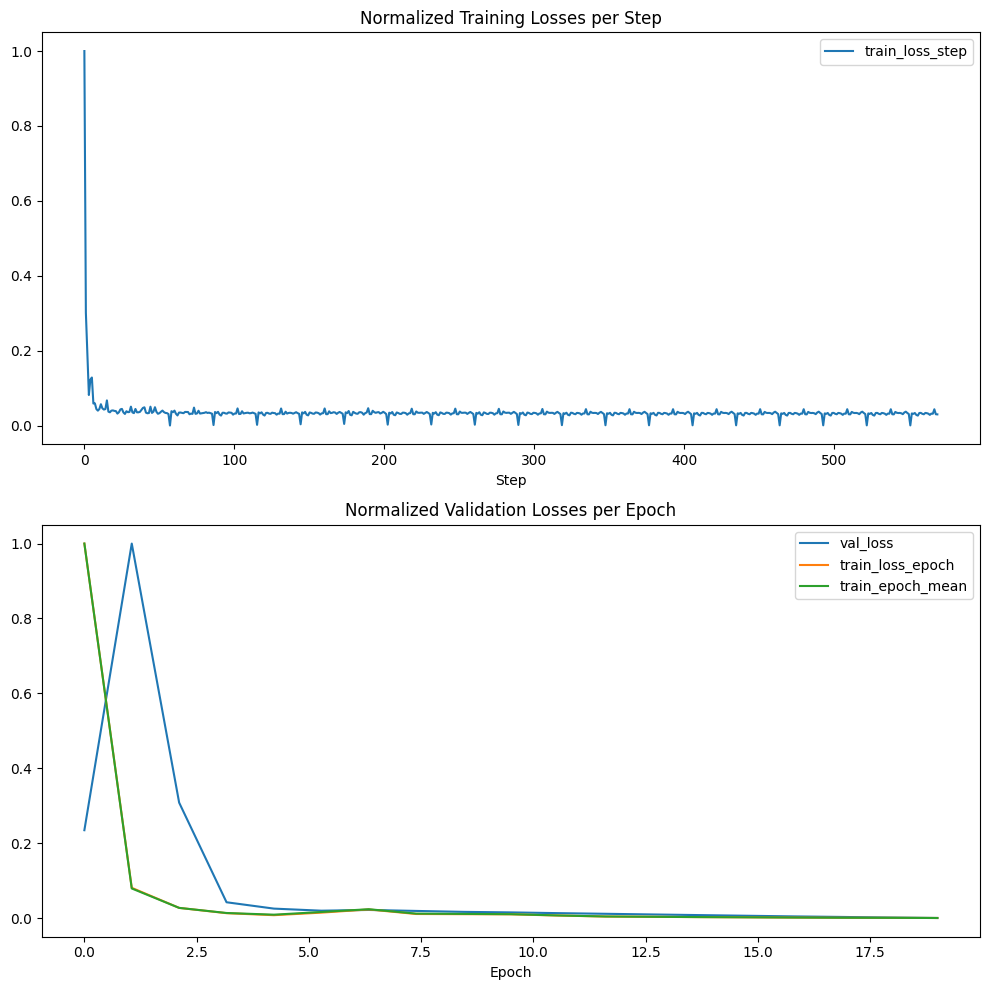

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

step_metrics = ['train_loss_step']
# epoch_metrics = ['val_loss', 'val_loss_ESR', 'val_loss_DC', 'train_loss_epoch', 'train_epoch_mean']
epoch_metrics = ['val_loss', 'train_loss_epoch', 'train_epoch_mean']

# Normalize the metric values
scaler = MinMaxScaler()

# Separate data
train_df = df[df.step.notnull()]
val_df = df[df.epoch.notnull()]

# Generate a linspace for plotting
steps_train = np.linspace(0, len(train_df), len(train_df))
epochs_val = np.linspace(0, len(val_df), len(val_df))

# Plot step metrics
fig, axs = plt.subplots(2, 1, figsize=(10,10))

for metric in step_metrics:
    # Drop rows with NaNs in the current metric column
    train_df_metric = train_df.dropna(subset=[metric])

    # Scale the metric data
    metric_data = scaler.fit_transform(train_df_metric[[metric]])

    # Create linspace for the current metric
    steps_train_metric = np.linspace(0, len(train_df_metric), len(train_df_metric))

    axs[0].plot(steps_train_metric, metric_data, label=metric)

axs[0].set_title("Normalized Training Losses per Step")
axs[0].set_xlabel("Step")
axs[0].legend()

# Plot validation metrics
for metric in epoch_metrics:
    # Drop rows with NaNs in the current metric column
    val_df_metric = val_df.dropna(subset=[metric])

    # Scale the metric data
    metric_data = scaler.fit_transform(val_df_metric[[metric]])

    # Create linspace for the current metric
    epochs_val_metric = np.linspace(0, len(val_df_metric), len(val_df_metric))

    axs[1].plot(epochs_val_metric, metric_data, label=metric)

axs[1].set_title("Normalized Validation Losses per Epoch")
axs[1].set_xlabel("Epoch")
axs[1].legend()

plt.tight_layout()
plt.show()



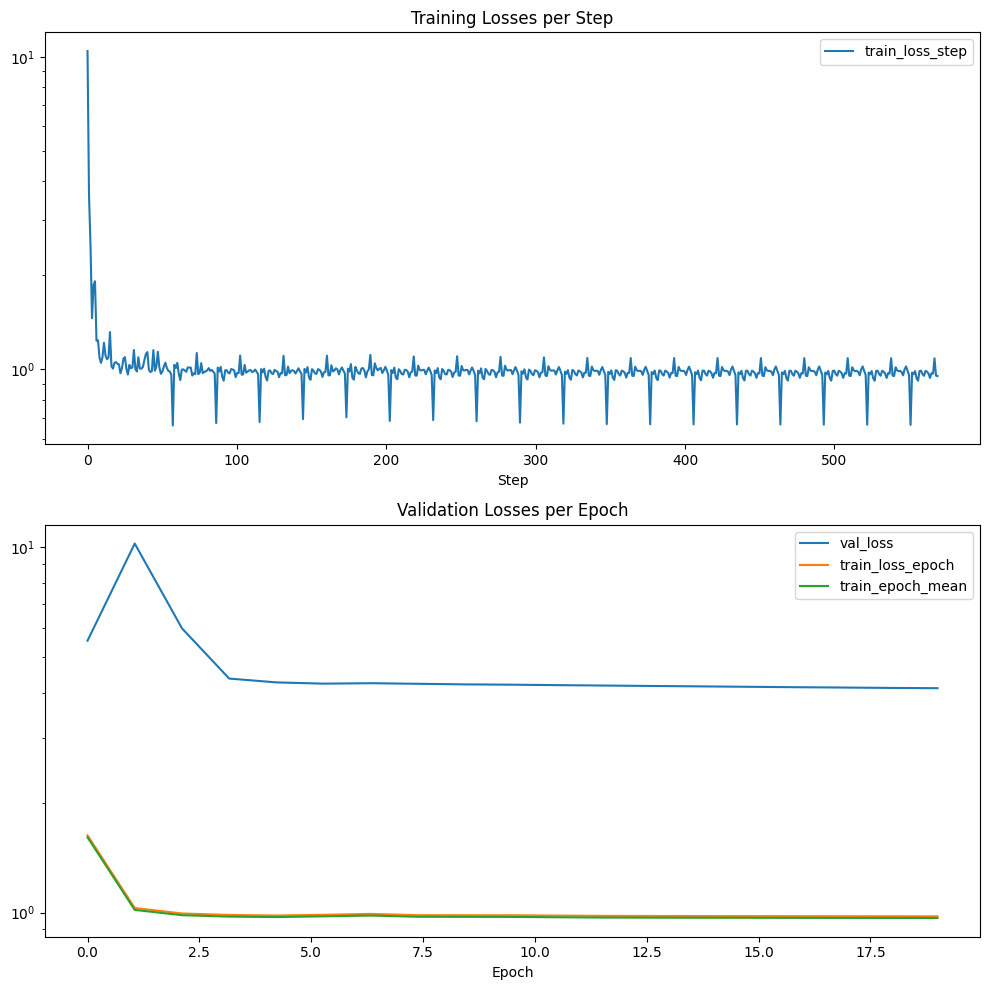

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

step_metrics = ['train_loss_step']
# epoch_metrics = ['val_loss', 'val_loss_ESR', 'val_loss_DC', 'train_loss_epoch', 'train_epoch_mean']
epoch_metrics = ['val_loss', 'train_loss_epoch', 'train_epoch_mean']

# Normalize the metric values
scaler = MinMaxScaler()

# Separate data
train_df = df[df.step.notnull()]
val_df = df[df.epoch.notnull()]

# Generate a linspace for plotting
steps_train = np.linspace(0, len(train_df), len(train_df))
epochs_val = np.linspace(0, len(val_df), len(val_df))

# Plot step metrics
fig, axs = plt.subplots(2, 1, figsize=(10,10))

for metric in step_metrics:
    # Drop rows with NaNs in the current metric column
    train_df_metric = train_df.dropna(subset=[metric])

    # Scale the metric data
    metric_data = scaler.fit_transform(train_df_metric[[metric]])

    # Create linspace for the current metric
    steps_train_metric = np.linspace(0, len(train_df_metric), len(train_df_metric))

    axs[0].plot(steps_train_metric, train_df_metric[[metric]], label=metric)

axs[0].set_title("Training Losses per Step")
axs[0].set_xlabel("Step")
axs[0].set_yscale('log')
axs[0].legend()

# Plot validation metrics
for metric in epoch_metrics:
    # Drop rows with NaNs in the current metric column
    val_df_metric = val_df.dropna(subset=[metric])

    # Scale the metric data
    # metric_data = scaler.fit_transform(val_df_metric[[metric]])

    # Create linspace for the current metric
    epochs_val_metric = np.linspace(0, len(val_df_metric), len(val_df_metric))

    axs[1].plot(epochs_val_metric,val_df_metric[[metric]], label=metric)

axs[1].set_title("Validation Losses per Epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_yscale('log')

axs[1].legend()

plt.tight_layout()
plt.show()
